In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Load the data
df = pd.read_csv("../dataset/data_cleaned.csv")

# Display the first few rows of the dataset
df.head()

,Bea Dasar,Htnb,Total,Harga Barang,Berat Kiriman,Jarak (KM)
0,34000.0,960.0,34960.0,400000.0,1.00,1042.297394
1,28000.0,500.0,28500.0,200000.0,0.50,55.550328
2,19000.0,0.0,19000.0,15000.0,0.15,59.972951
3,17000.0,1920.0,18920.0,800000.0,2.60,12.435856
4,18500.0,500.0,19000.0,200000.0,1.00,123.701070


In [3]:
# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the data
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Print the normalized data
print(df_scaled)

      Bea Dasar      Htnb     Total  Harga Barang  Berat Kiriman  Jarak (KM)
0      0.013818  0.026667  0.014135      0.026667       0.008333    0.434647
1      0.010747  0.013889  0.010870      0.013333       0.004167    0.018196
2      0.006141  0.000000  0.006067      0.001000       0.001250    0.020063
3      0.005118  0.053333  0.006026      0.053333       0.021667    0.000000
4      0.005885  0.013889  0.006067      0.013333       0.008333    0.046959
...         ...       ...       ...           ...            ...         ...
3427   0.001024  0.000000  0.001011      0.001033       0.000417    0.046959
3428   0.001535  0.000000  0.001517      0.001500       0.000417    0.010468
3429   0.002047  0.000000  0.002022      0.002567       0.001083    0.037438
3430   0.000000  0.000000  0.000000      0.001000       0.000417    0.000000
3431   0.001024  0.000000  0.001011      0.000720       0.001000    0.046959

[3432 rows x 6 columns]


In [4]:
# Features and target
X = df_scaled[['Harga Barang', 'Berat Kiriman', 'Jarak (KM)', 'Htnb']]
y = df_scaled['Bea Dasar']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Text(0.5, 1.0, 'Harga Barang vs Bea Dasar')

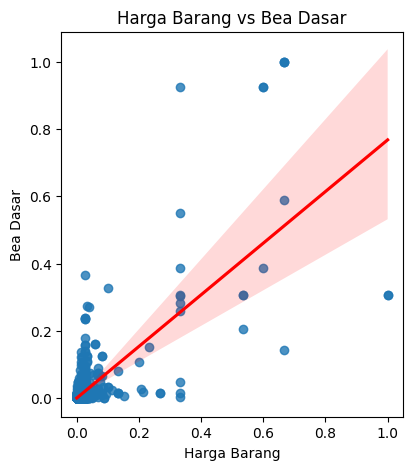

In [5]:
# Visualization
plt.figure(figsize=(15, 5))

# Plot 1: Harga Barang vs Bea Dasar
plt.subplot(1, 3, 1)
sns.regplot(x='Harga Barang', y='Bea Dasar', data=df_scaled, line_kws={"color": "red"})
plt.title('Harga Barang vs Bea Dasar')

Text(0.5, 1.0, 'Berat Kiriman vs Bea Dasar')

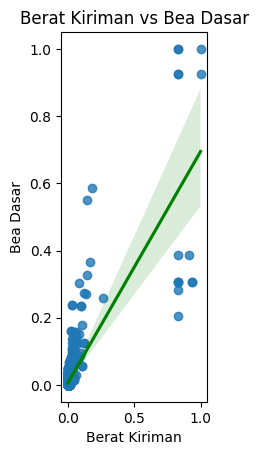

In [6]:
# Plot 2: Berat Kiriman vs Bea Dasar
plt.subplot(1, 3, 2)
sns.regplot(x='Berat Kiriman', y='Bea Dasar', data=df_scaled, line_kws={"color": "green"})
plt.title('Berat Kiriman vs Bea Dasar')

Text(0.5, 1.0, 'Jarak (KM) vs Bea Dasar')

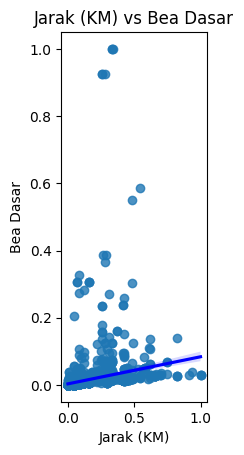

In [7]:
# Plot 3: Jarak (KM) vs Bea Dasar
plt.subplot(1, 3, 3)
sns.regplot(x='Jarak (KM)', y='Bea Dasar', data=df_scaled, line_kws={"color": "blue"})
plt.title('Jarak (KM) vs Bea Dasar')

In [8]:
# Create the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:

# Predict the target on the test data
y_pred = model.predict(X_test)

In [10]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation results
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")


Mean Squared Error (MSE): 0.000
Root Mean Squared Error (RMSE): 0.013
Mean Absolute Error (MAE): 0.003
R-squared (R²): 0.915
